## Preamble

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from subprocess import Popen, PIPE, STDOUT
import matplotlib.pyplot as plt
import os
from copy import deepcopy
import galsim 
import corner 

from matplotlib.patches import Ellipse

In [3]:
#directories that would be using 
repo = '/Users/Ismael/code/lensing/SMFF/'
os.chdir(repo)

In [4]:
#colormap default to use for galaxy 
cmap = 'bwr'

In [5]:
def showImage(image,ax=None,extent=None,vmin=None,vmax=None,origin=None):
    
    if vmin == None: 
        vmin = -abs(image).max()
    if vmax == None: 
        vmax = abs(image).max()
    
    
    if ax is None: 
        return plt.imshow(image, cmap=cmap,vmax=vmax,vmin=vmin,interpolation='None',origin=origin, extent=extent)
    else: 
        return ax.imshow(image, cmap=cmap,vmax=vmax,vmin=vmin,interpolation='None',origin=origin,extent=extent)

In [11]:
def plot_matrix(matrix, param_names): 

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    n,_ = matrix.shape #assume square matrix
    plt.xticks(list(plt.xticks()[0]), [None] + param_names)
    plt.yticks(list(plt.yticks()[0]), [None] + param_names)
    
    plt.tick_params(labelsize=20)


    ax.matshow(matrix, cmap=plt.cm.Blues)


    for i in xrange(n):
        for j in xrange(n):
            c = matrix[j,i]
            ax.text(i, j, '{:.2g}'.format(c), va='center', ha='center',size=20)

In [12]:
latex_names =[r'$\rm{flux}$','$x_{0}$','$y_{0}$',r'$\rm{HLR}$','$e_{1}$','$e_{2}$']

In [13]:
#plotting constants
LINEWIDTH = 2
AXIS_NUMBER_SIZE = 45 
AXIS_LABEL_SIZE = 55 
AXIS_WIDTH = 3
AXIS_LENGTH = 12

FIG_SIZE = 40 

MARKER_SIZE = 14
LINE_WIDTH = 5

## Plots for two galaxies 

In [14]:
#parameters of first galaxy to draw. we assume that both galaxies have same psf and snr (which only depends on the background) throughout. 

model_1 = 'gaussian' #possible options of model and psf_model are in documentation. 
e1_1 = 0.2
e1_2 = 0.2
hlr_1 = .5
flux_1 = 1. 
x0_1 = 2 #this is in arcsecs.  
y0_1 = 0. 

#parameters of second galaxy to draw. 
model_2 = 'gaussian'  
e2_1 = -0.2
e2_2 = -0.2
hlr_2 = .5
flux_2 = 1. 
x0_2 = -2
y0_2 = 0.

#general parameters
snr = 20. 
psf_fwhm = .7
psf_model = 'psf_gaussian'


#project folder name where you want to write galaxy information 
project2 = 'project-tutorial2'

#image parameters 
pixel_scale=.2 
nx = 40
ny = 40

In [15]:
cmd1 = 'python generate.py -p {0} -gal 1 --galaxy-model {1} --psf_model {2}  --e1 {3} --e2 {4} --x0 {5} --y0 {6} \
--flux {7} --psf_flux 1. --hlr {8} --psf_fwhm {9} --snr {10}'.format(project2,model_1,psf_model,e1_1,e1_2,x0_1,y0_1,flux_1,hlr_1,psf_fwhm,snr)
p1 = Popen(cmd1, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output1 = p1.stdout.read()
print output1

In [16]:
cmd2 = 'python generate.py -p {0} -gal 2 --galaxy-model {1} --psf_model {2}  --e1 {3} --e2 {4} --x0 {5} --y0 {6} \
--flux {7} --psf_flux 1. --hlr {8} --psf_fwhm {9} --snr {10}'.format(project2,model_2,psf_model,e2_1,e2_2,x0_2,y0_2,flux_2,hlr_2,psf_fwhm,snr)
p2 = Popen(cmd2, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
output2 = p2.stdout.read()
print output2



### Read galaxies data, 


In [17]:
import analysis.fisher as fisher
import analysis.galfun as galfun

In [18]:
#works the same way as before, 
g_parameters = galfun.GParameters(project2) #extract parameters from file created by generate.py 
image_renderer = galfun.ImageRenderer(pixel_scale=pixel_scale,
                                      nx=nx,ny=ny)
fish = fisher.Fisher(g_parameters=g_parameters,image_renderer=image_renderer, 
                     snr=snr)

### Draw the galaxies 

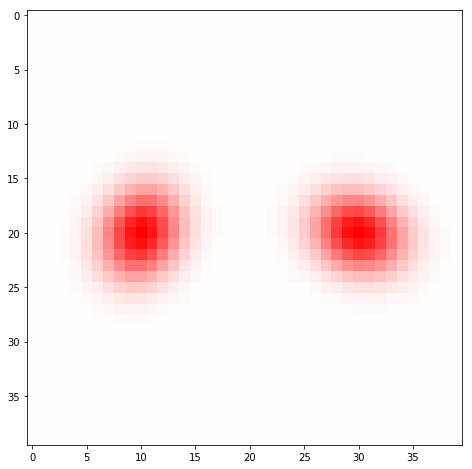

In [20]:
#get galaxy image and display it from fisher object. green is positive and red is negative 
plt.figure(figsize=(8,8))
showImage(fish.image.array)



### Bias as a function of distance between the two 

In [22]:
#assume both have y = 0
def biasSeparation(fish,image_renderer,params,num_params):
    plt.rc('text', usetex=True)
    separation_range = (.7, 2.)  # arcsecs.
    steps = 20
    separations = np.linspace(separation_range[0],separation_range[1],steps)
  
    labels = ['1','2','3','4']
    parameters = [((.5,1.),(0.,0.,0.,0.)),
                  ((.5,1.),(0.2,0.2,0.2,0.2)),
                  ((.5,1.),(0.2,0.2,-0.2,-0.2)),
                  ((.5,.5),(0.2,0.2,-0.2,-0.2))
                 ]
    
    #plot the types of galaxies: 
    num_plots = len(parameters)
    figure = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
    for i,(label,(hlrs,ellipticities)) in enumerate(zip(labels,parameters)):
        ax = figure.add_subplot(1, num_plots, i + 1)
        
        if i == 0: 
            plt.tick_params(
            axis='both',     
            which='both',      
            bottom='on',   
            top='off',        
            left='on',
            labelleft='on',
            right='off',
            labelbottom='on')
            
        else: 
            plt.tick_params(
            axis='both',     
            which='both',      
            bottom='on',   
            top='off',        
            left='off',
            labelleft='off',
            right='off',
            labelbottom='on')

        hlr1,hlr2 = hlrs 
        e1_1,e2_1,e1_2,e2_2 = ellipticities
        
        id_params = deepcopy(fish.g_parameters.id_params)
        ids = id_params.keys()
        id1 = ids[0]
        id2 = ids[1]
        id_params[id1]['hlr'] = hlr1
        id_params[id2]['hlr'] = hlr2
        id_params[id1]['e1'] = e1_1
        id_params[id1]['e2'] = e2_1
        id_params[id2]['e1'] = e1_2
        id_params[id2]['e2'] = e2_2
        
        #adjust centers to maximum distance 
        id_params[id1]['x0'] = -2.
        id_params[id2]['x0'] = 2.
        id_params[id1]['y0'] = 0.
        id_params[id2]['y0'] = 0.


        
        g_parameters = galfun.GParameters(id_params=id_params)
        fish = fisher.Fisher(g_parameters, image_renderer, snr)
        
        print 'the snrs are: {}'.format(fish.snrs)
        
        ax.text(0.5, 0.8, label,
                transform=ax.transAxes,fontsize=60)
        
        ax.text(0.225, 0.225, 'a',
                transform=ax.transAxes,fontsize=60)
        
        ax.text(0.75, 0.225, 'b',
                transform=ax.transAxes,fontsize=60)
        
        #add ellipse to guide eye. 
        pixel_scale = image_renderer.pixel_scale
        
        #first get semi-major and semi-minor axis 
        e1 = np.sqrt(e1_1**2 + e2_1**2)
        e2 = np.sqrt(e1_2**2 + e2_2**2)
        q1 = np.sqrt((1 - e1)/( 1+ e1)) 
        q2 = np.sqrt((1 - e2)/( 1+ e2))
        b1 = np.sqrt(q1 * hlr1**2)  # assuming that hlr = np.sqrt(a * b) 
        b2 = np.sqrt(q2 * hlr2**2)
        a1 = b1/q1 
        a2 = b2/q2 
        
        
        #set the angles
        if e1 == 0: 
            theta1 = 0. 
        if e2 == 0: 
            theta2 = 0. 
        
        if e1_1 > 0 : 
            theta1= 360 - 22.5 
        if e1_2 > 0: 
            theta2= 360 - 22.5
        else: 
            theta2 = 90 - 22.5 
                
        ell_1 = Ellipse(xy=(-10,0), width=a1*2/pixel_scale, height=b1*2/pixel_scale, angle=theta1,facecolor='none',edgecolor='b', lw=4)
        ell_2 = Ellipse(xy=(10,0), width=a2*2/pixel_scale, height=b2*2/pixel_scale, angle=theta2,facecolor='none',edgecolor='b', lw=4)

        ax.add_artist(ell_1)
        ax.add_artist(ell_2)


        
        plt.xlim((-20,20))
        plt.ylim((-20,20))
        showImage(fish.image.array,ax,vmin=None,vmax=None,extent=[-20.5,19.5,-19.5,20.5])
        plt.tick_params(axis='both', which='major', labelsize=35)
        plt.xticks([-15,-10, -5, 0, 5, 10, 15],['$-15$','$-10$', '$-5$', '$0$', '$5$', '$10$', '$15$'])
        
        

    plt.tight_layout()        
    plt.savefig('/Users/Ismael/Desktop/separation-plot1.jpeg')
        
    #now plot the ellipticity bias as a function of the distance between the two: 
    figure = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
    y_titles = [r'$b(e^{a}_{1})$',
               r'$b(e^{b}_{1})$',
               r'$b(e^{a}_{2})$',
               r'$b(e^{b}_{2})$']
    x_titles = [r'$|x^{a}_{0} - x^{b}_{0}|$ [$\rm{arcsecs}$]'] * 4
    units = ['','', '', '']
    y_final_titles = [y_title + ' {0}'.format(unit) for y_title,unit in zip(y_titles,units)]
    
    axes = []
    for i in range(num_params): 
        axes.append(figure.add_subplot(2, num_params / 2, i + 1))
        plt.axhline(0,color='purple')


    
    for i,ax in enumerate(axes): 
        plt.rc('text', usetex=True)
        param = params[i]
        ax.set_xlabel(x_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.set_ylabel(y_final_titles[i], fontsize=AXIS_LABEL_SIZE)
        ax.tick_params(labelsize=AXIS_NUMBER_SIZE)
        ax.tick_params(which='both', width=AXIS_WIDTH,length = AXIS_LENGTH)
    
    for i,(label,(hlrs,ellipticities)) in enumerate(zip(labels,parameters)):
        hlr1,hlr2 = hlrs 
        e1_1,e2_1,e1_2,e2_2 = ellipticities

        
        id_params = deepcopy(fish.g_parameters.id_params)
        ids = id_params.keys()
        id1 = ids[0]
        id2 = ids[1]
        id_params[id1]['hlr'] = hlr1
        id_params[id2]['hlr'] = hlr2
        id_params[id1]['e1'] = e1_1
        id_params[id1]['e2'] = e2_1
        id_params[id2]['e1'] = e1_2
        id_params[id2]['e2'] = e2_2
        biases = {}
        for separation in separations:
            pos1 = -separation / 2
            pos2 = separation / 2
            id_params[id1]['x0'] = pos1
            id_params[id2]['x0'] = pos2
            g_parameters = galfun.GParameters(id_params=id_params)
            fish = fisher.Fisher(g_parameters, image_renderer, snr)
            for i in range(num_params):
                param = params[i]
                if param not in biases:
                    biases[param] = []
                bias = fish.biases[param]
                biases[param].append(bias)

        for i,ax in enumerate(axes):
            param = params[i]
            ax.plot(separations, biases[param],'-o',linewidth=3,markersize=12,label=label)
            legend = ax.legend(loc='best', fontsize=40)

    figure.subplots_adjust(wspace=.3)
    plt.tight_layout()                  
    plt.savefig('/Users/Ismael/Desktop/separation-plot2.jpeg')

the snrs are: [20.0, 11.5608162173652]
the snrs are: [20.0, 11.578960698964316]
the snrs are: [20.0, 11.595411183757053]
the snrs are: [20.0, 20.000000803485246]


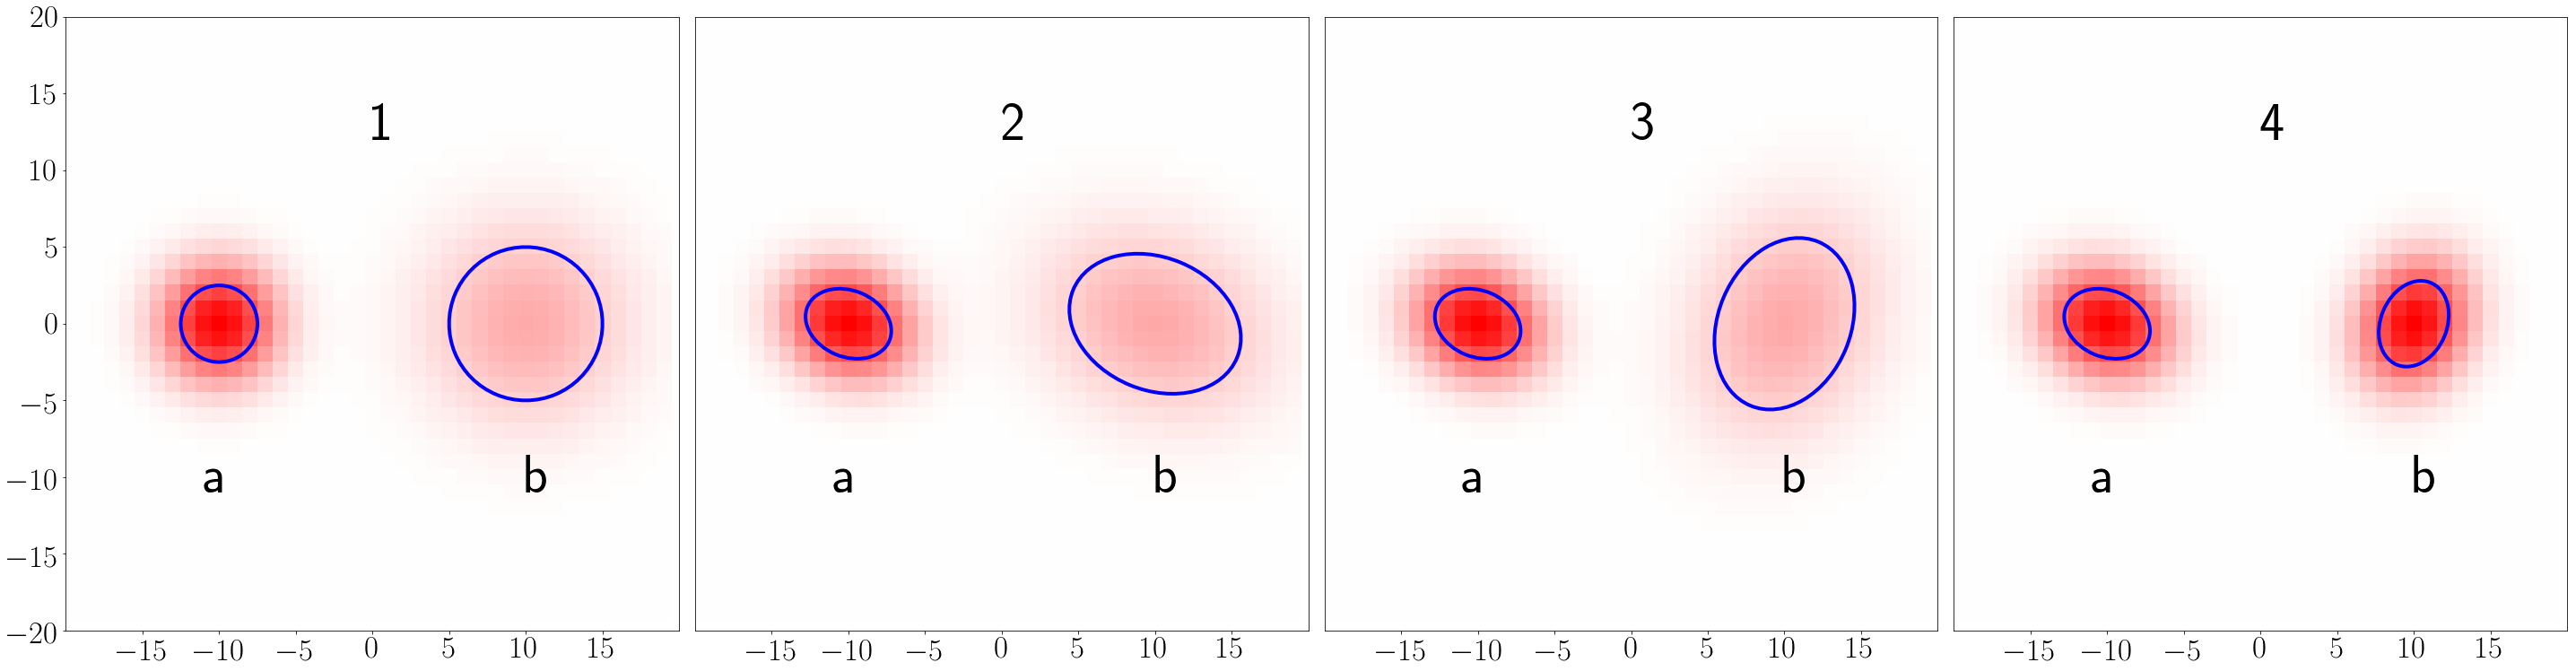

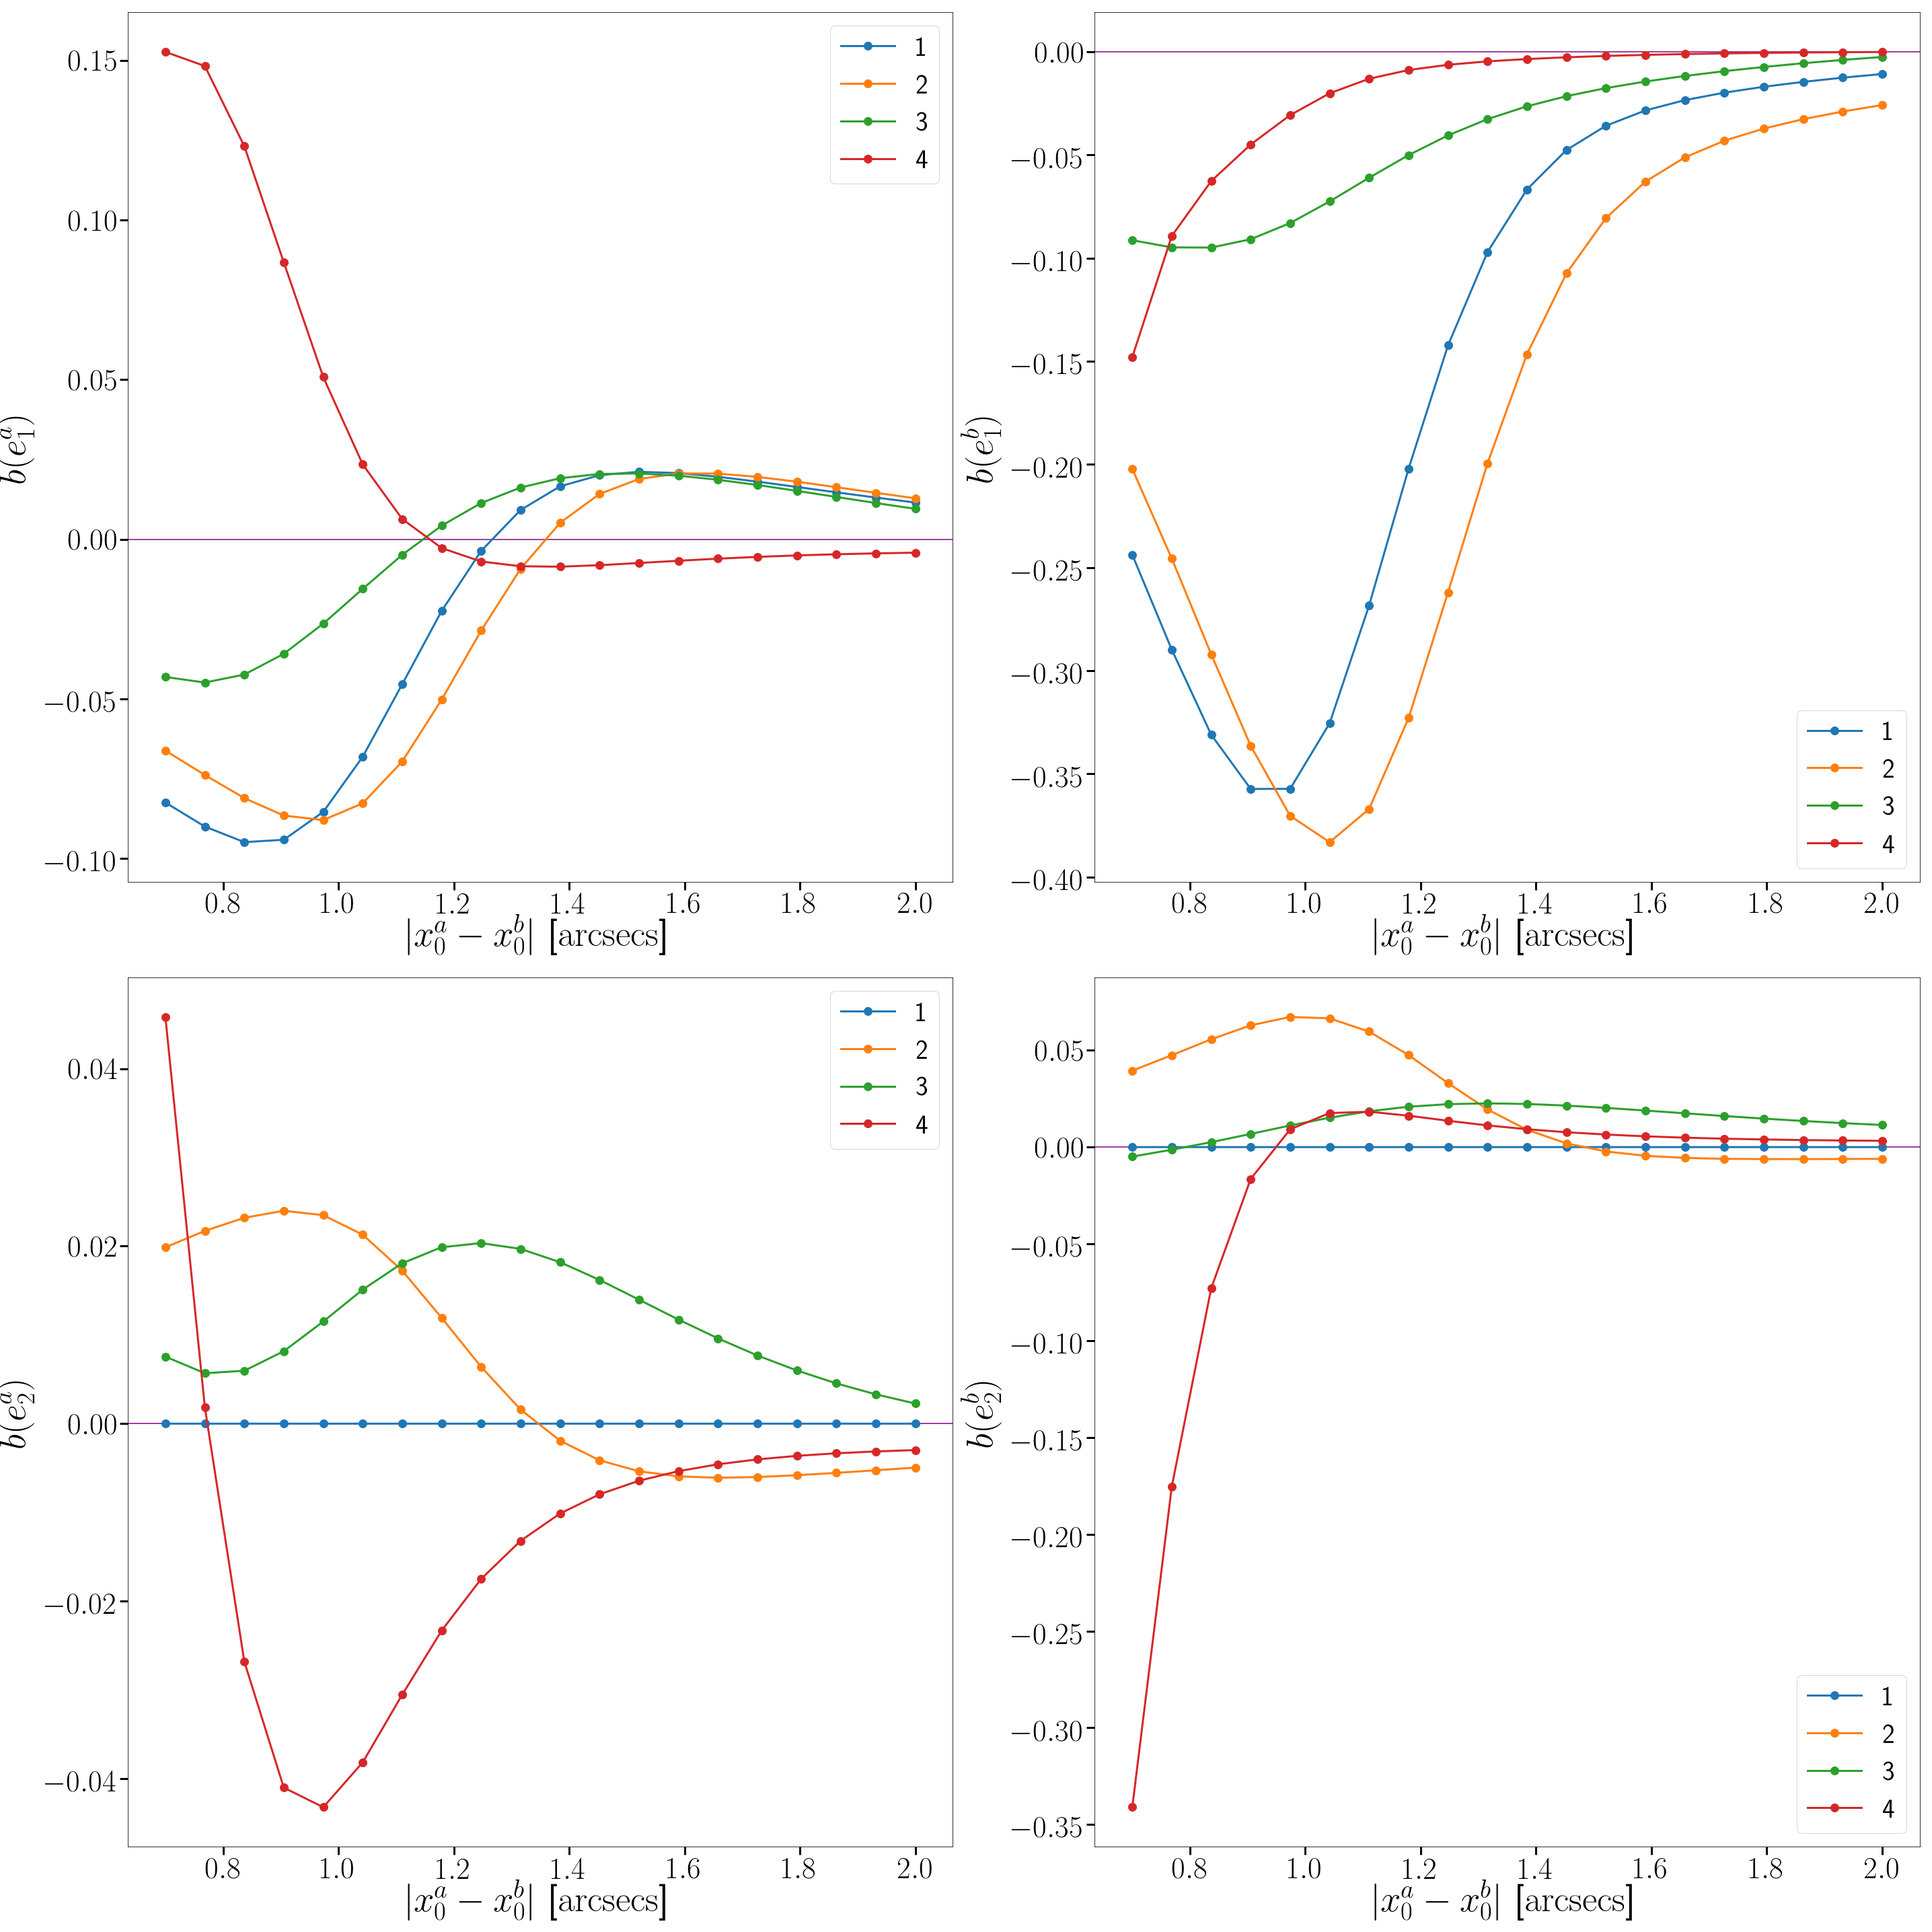

In [23]:
biasSeparation(fish,image_renderer,['e1_1','e1_2','e2_1','e2_2'],4)